#**Using pure PyTorch linear modules to build a 3 layer neural network**

In [1]:
import torch 
import numpy
import math

In [2]:
#generating 3-d non linear data

n_samples = 200
d = 3
x = torch.FloatTensor(n_samples, d).uniform_(-1, 1)

weights_true = torch.tensor([[5, 1, 6], [1, 6, 1]]).float()
weights_true = torch.transpose(weights_true, 0, 1) #transposing to multiply in the next step
bias_true = torch.tensor([1, 1])

y_true = torch.mm((x ** 2), weights_true) + torch.mm(x, weights_true) + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: torch.Size([200, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2]), y: torch.Size([200, 2])


###plotting the data

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_3d(x, y, y_pred=None):
  X_embedded = TSNE(n_components=2).fit_transform(x)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_embedded[:, 0], X_embedded[:, 1], y, label='underlying function') 
  if y_pred is not None:
    ax.scatter(X_embedded[:, 0], X_embedded[:, 1], y_pred, label='our function')
  plt.legend()

###Plotting both the labels in y_true

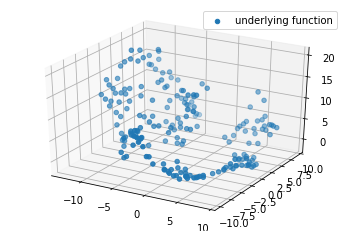

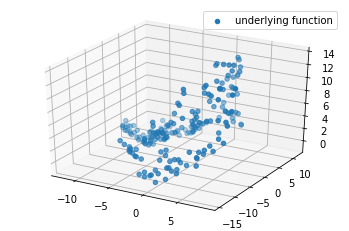

In [4]:
plot_3d(x, y_true[:, 0])
plot_3d(x, y_true[:, 1])

###Defining the PyTorch model using Linear module

In [5]:
import torch.nn as nn

class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 10)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(10, 2)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

###Defining the fit method and training the PyTorch model

In [10]:
from typing import Callable

def torch_fit(x, y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss_value = loss(y_pred, y_true)
    print(loss_value)
    loss_value.backward()
    optimizer.step()
  
loss = nn.MSELoss()
model = TorchModel(d, 20)

torch_fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=50)

tensor(45.6015, grad_fn=<MseLossBackward>)
tensor(39.8749, grad_fn=<MseLossBackward>)
tensor(34.1802, grad_fn=<MseLossBackward>)
tensor(25.4883, grad_fn=<MseLossBackward>)
tensor(15.8700, grad_fn=<MseLossBackward>)
tensor(12.7627, grad_fn=<MseLossBackward>)
tensor(10.9826, grad_fn=<MseLossBackward>)
tensor(10.0838, grad_fn=<MseLossBackward>)
tensor(10.4920, grad_fn=<MseLossBackward>)
tensor(16.9314, grad_fn=<MseLossBackward>)
tensor(27.7471, grad_fn=<MseLossBackward>)
tensor(36.2400, grad_fn=<MseLossBackward>)
tensor(33.3073, grad_fn=<MseLossBackward>)
tensor(30.8152, grad_fn=<MseLossBackward>)
tensor(28.5514, grad_fn=<MseLossBackward>)
tensor(26.4043, grad_fn=<MseLossBackward>)
tensor(24.3135, grad_fn=<MseLossBackward>)
tensor(22.3457, grad_fn=<MseLossBackward>)
tensor(20.6096, grad_fn=<MseLossBackward>)
tensor(18.9890, grad_fn=<MseLossBackward>)
tensor(17.1507, grad_fn=<MseLossBackward>)
tensor(14.9854, grad_fn=<MseLossBackward>)
tensor(13.0677, grad_fn=<MseLossBackward>)
tensor(11.3

###Plotting both the labels in y_true and y_pred

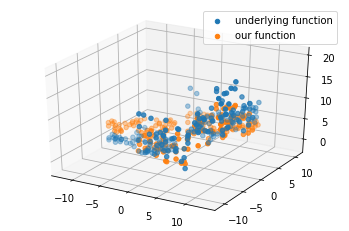

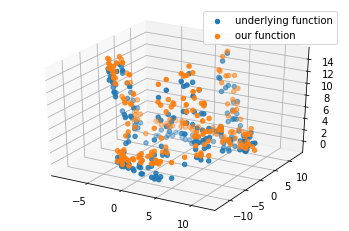

In [11]:
plot_3d(x, y_true[:, 0], model(x)[:, 0].detach().numpy())
plot_3d(x, y_true[:, 1], model(x)[:, 1].detach().numpy())